Data Set Preparation

In [25]:
import os 
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.utils import np_utils

In [15]:
data_path=r'D:\ML&DL\Projects\CNN Image Classification\PetImages'

categories=os.listdir(data_path)
print(categories)

labels=np.arange(len(categories))
print(labels)

label_dict=dict(zip(categories,labels))
print(label_dict)

['Cat', 'Dog']
[0 1]
{'Cat': 0, 'Dog': 1}


In [16]:
import random

img_size=224

data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in random.sample(img_names,1000):
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        #cv2.imshow('LIVE',img)
        #cv2.waitKey(100)
        try:
            resized=cv2.resize(img,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as e:
            print(e)

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [17]:
data=np.array(data)
target=np.array(target)

print(data.shape)
print(target.shape)

(1998, 224, 224, 3)
(1998,)


array([0., 1.], dtype=float32)

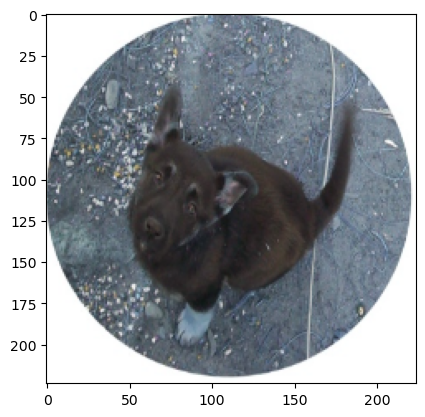

In [18]:
plt.imshow(data[1000],cmap='gray')
target_new[1000]

In [19]:
from keras.utils import np_utils
data_new=data/255.0
target_new=np_utils.to_categorical(target)

In [20]:
# np.save('data-mobile-net_new',data_new)
# np.save('target-mobile-net_new',target_new)

In [23]:
print(data_new.shape)
print(target_new.shape)

(1998, 224, 224, 3)
(1998, 2)


Model Creation

In [26]:
data=np.load('data-mobile-net_new.npy')
target=np.load('target-mobile-net_new.npy')

In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224,224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    
    layer.trainable = False

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
model.summary()

9406464/9406464 [==============================] - 7s 1us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

In [28]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [29]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10)

Epoch 1/10
57/57 [==============================] - 43s 694ms/step - loss: 0.1961 - accuracy: 0.9338 - val_loss: 0.0760 - val_accuracy: 0.9650
Epoch 2/10
57/57 [==============================] - 39s 684ms/step - loss: 0.0657 - accuracy: 0.9755 - val_loss: 0.0864 - val_accuracy: 0.9700
Epoch 3/10
57/57 [==============================] - 42s 746ms/step - loss: 0.0594 - accuracy: 0.9794 - val_loss: 0.0821 - val_accuracy: 0.9650
Epoch 4/10
57/57 [==============================] - 39s 687ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0965 - val_accuracy: 0.9650
Epoch 5/10
57/57 [==============================] - 40s 696ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.1385 - val_accuracy: 0.9700
Epoch 6/10
57/57 [==============================] - 41s 716ms/step - loss: 0.0199 - accuracy: 0.9917 - val_loss: 0.1074 - val_accuracy: 0.9750
Epoch 7/10
57/57 [==============================] - 42s 732ms/step - loss: 0.0251 - accuracy: 0.9911 - val_loss: 0.0928 - val_accuracy: 0.9700

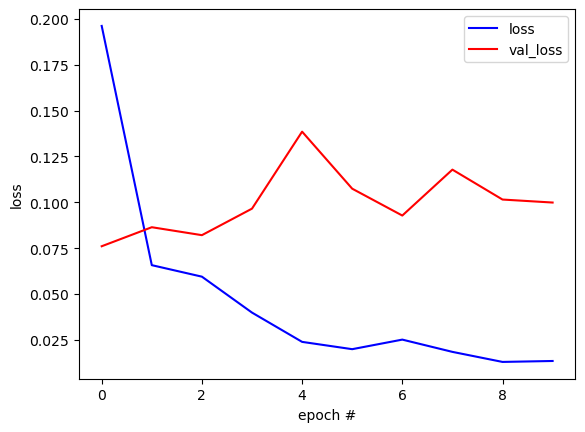

In [31]:
plt.plot(model.history.history['loss'],'b',label='loss')
plt.plot(model.history.history['val_loss'],'r',label='val_loss')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

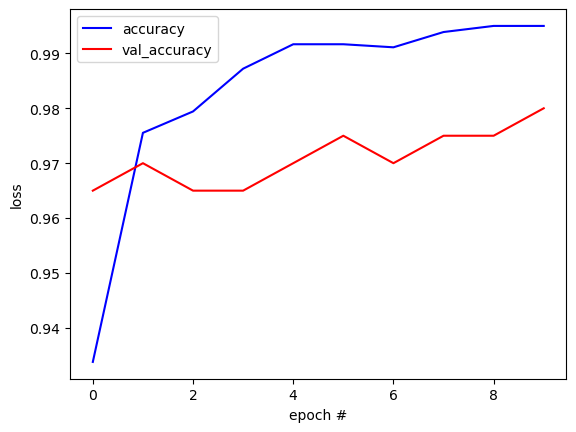

In [32]:
plt.plot(model.history.history['accuracy'],'b',label='accuracy')
plt.plot(model.history.history['val_accuracy'],'r',label='val_accuracy')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()


In [33]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 3s 416ms/step - loss: 0.0998 - accuracy: 0.9800
[0.09984327107667923, 0.9800000190734863]
